# Breast cancer prediction

## Problem Statement

Breast cancer is a type of cancer that develops in the cells of the breasts. It typically starts in the lining cells of the ducts or lobules of the glandular tissue in the breast. In the early stages, breast cancer growth is confined to the duct or lobule and generally causes no symptoms, and has minimal potential for spreading to other parts of the body.

Diagnosing breast cancer involves microscopic analysis of a sample or biopsy of the affected area of the breast. While most types of breast cancer are easy to diagnose through a biopsy, there are some types of breast cancer that require specialized lab exams

This  model is trained for dataset of breast tumor information, including features such as tumor size, shape, and texture. After training,  the performance of  model is evaluated and compared their accuracy in predicting malignant and benign tumors.

## Loading the Dataset

In [1]:
#displaying the content of file
N = 15
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as f:
    dataset_content = f.readlines()

head_rows = dataset_content[:N]

for row in head_rows:
    columns = row.strip().split(',')
    print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
['842302', '1', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656', '0.7119', '0.2654', '0.4601', '0.1189']
['842517', '1', '20.57', '17.77', '132.9', '1326', '0.08474', '0.07864', '0.0869', '0.07017', '0.1812', '0.05667', '0.5435'

In [2]:
#reading first five lines
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as f:
    for i in range(5):
        line = f.readline()
        print(line)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst

842302,1,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

842517,1,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902

84300903,1,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.

## Pre-processing Steps

#### Checking the columns

In [3]:
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as f:
    first_line = f.readline().strip()
    columns = first_line.split(',')
    print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


strip() - deletes white spaces from the begin and the end of input
split(' ') - splits input into elements of an list with (' ') being as separator.

#### Checking the lenght of columns

In [4]:
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as file:
    length = []
    for line in file:
        values = line.split(',')
        length.append(len(values))
    print("Columns:", max(length))

Columns: 32


#### Checking missing values

In [5]:
#checking missing values

with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as file:
    row_count = 0 
    missing_values_count = 0
    
    for line in file:
        if row_count == 0:
            row_count += 1
            continue
        values = line.strip().split(',')
        
        for value in values:
            if value == '' or value == 'na': 
                missing_values_count += 1
        
        row_count += 1

print("Total missing values:", missing_values_count)

Total missing values: 10


In [6]:
with open('C:/Users/lenovo/Documents/Practice/data.csv', 'r') as file:
    row_count = 0

    values = []
    q1_values = []
    q3_values = []

    for line in file:
        if row_count == 0:
            row_count += 1
            continue
        row_values = line.strip().split(',')

        for value in row_values:
            values.append(float(value))
        row_count += 1

    sorted_values = sorted(values)

    n = len(sorted_values)
    q1_index = int(n / 4)
    q3_index = int(3 * n / 4)
    q1 = sorted_values[q1_index]
    q3 = sorted_values[q3_index]

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_count = 0
    for value in values:
        if value < lower_bound or value > upper_bound:
            outlier_count += 1
    print('Outlier count:', outlier_count)


Outlier count: 2997


#### Importing libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("C:/Users/lenovo/Documents/Practice/data01.csv")

###### Checking Null Values in dataset

In [9]:
df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean            10
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

###### Heatmap to check the null values in dataset

<AxesSubplot:>

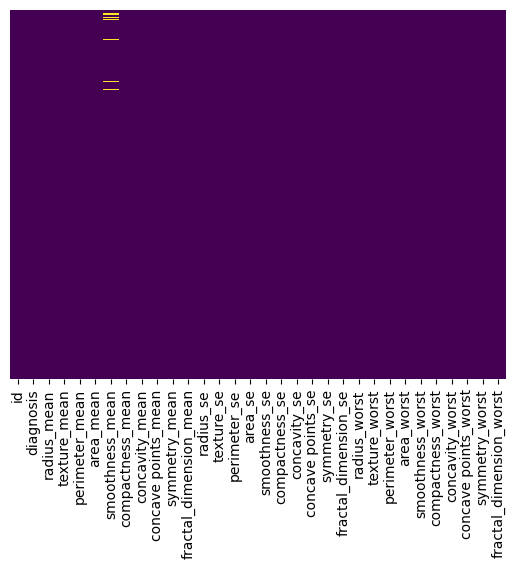

In [10]:
#create a simple heatmap to see for missing data!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

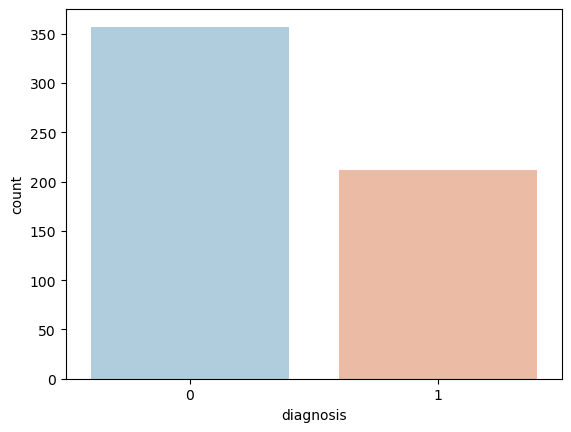

In [11]:
sns.countplot(x= 'diagnosis',data=df,palette='RdBu_r')

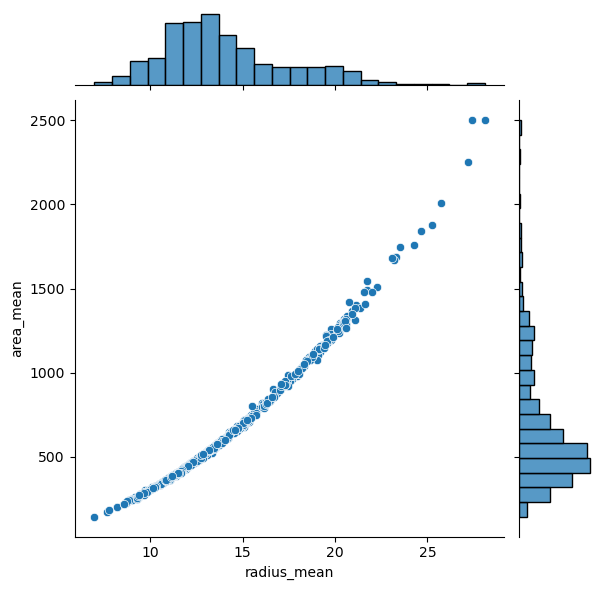

In [12]:
sns.jointplot(x = df['radius_mean'], y = df['area_mean'], kind = 'scatter')

###### To check datatypes

In [13]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

#### Checking the list of columns

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Median imputation

In [15]:
#finding the mean of 'Age' column and filling the null values with median value obtain
df['smoothness_mean'].fillna(df['smoothness_mean'].median(),inplace=True)

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

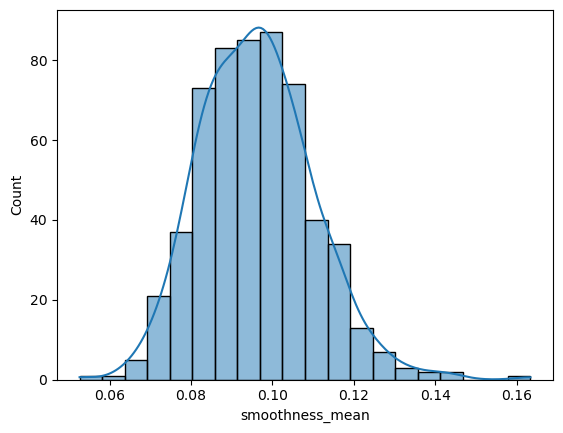

In [16]:
sns.histplot(data=df, x='smoothness_mean', bins=20, kde=True)

In [17]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64